In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# define filepath to read data
dir_path = './CMaps/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'train_FD001.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'test_FD001.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [3]:
train

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0            1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1            1            2     0.0019    -0.0003      100.0  518.67  642.15   
2            1            3    -0.0043     0.0003      100.0  518.67  642.35   
3            1            4     0.0007     0.0000      100.0  518.67  642.35   
4            1            5    -0.0019    -0.0002      100.0  518.67  642.37   
...        ...          ...        ...        ...        ...     ...     ...   
20626      100          196    -0.0004    -0.0003      100.0  518.67  643.49   
20627      100          197    -0.0016    -0.0005      100.0  518.67  643.54   
20628      100          198     0.0004     0.0000      100.0  518.67  643.42   
20629      100          199    -0.0011     0.0003      100.0  518.67  643.23   
20630      100          200    -0.0032    -0.0005      100.0  518.67  643.85   

           s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  \
0      1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1      1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2      1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3      1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4      1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   
...        ...      ...    ...  ...     ...      ...      ...     ...   ...   
20626  1597.98  1428.63  14.62  ...  519.49  2388.26  8137.60  8.4956  0.03   
20627  1604.50  1433.58  14.62  ...  519.68  2388.22  8136.50  8.5139  0.03   
20628  1602.46  1428.18  14.62  ...  520.01  2388.24  8141.05  8.5646  0.03   
20629  1605.26  1426.53  14.62  ...  519.67  2388.23  8139.29  8.5389  0.03   
20630  1600.38  1432.14  14.62  ...  519.30  2388.26  8137.33  8.5036  0.03   

       s_17  s_18   s_19   s_20     s_21  
0       392  2388  100.0  39.06  23.4190  
1       392  2388  100.0  39.00  23.4236  
2       390  2388  100.0  38.95  23.3442  
3       392  2388  100.0  38.88  23.3739  
4       393  2388  100.0  38.90  23.4044  
...     ...   ...    ...    ...      ...  
20626   397  2388  100.0  38.49  22.9735  
20627   395  2388  100.0  38.30  23.1594  
20628   398  2388  100.0  38.44  22.9333  
20629   395  2388  100.0  38.29  23.0640  
20630   396  2388  100.0  38.37  23.0522  

[20631 rows x 26 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [5]:
train[index_names].describe()


unit_nr   time_cycles
count  20631.000000  20631.000000
mean      51.506568    108.807862
std       29.227633     68.880990
min        1.000000      1.000000
25%       26.000000     52.000000
50%       52.000000    104.000000
75%       77.000000    156.000000
max      100.000000    362.000000

In [6]:
train[index_names].groupby('unit_nr').max().describe()

time_cycles
count   100.000000
mean    206.310000
std      46.342749
min     128.000000
25%     177.000000
50%     199.000000
75%     229.250000
max     362.000000

In [7]:
train[setting_names].describe()

setting_1     setting_2  setting_3
count  20631.000000  20631.000000    20631.0
mean      -0.000009      0.000002      100.0
std        0.002187      0.000293        0.0
min       -0.008700     -0.000600      100.0
25%       -0.001500     -0.000200      100.0
50%        0.000000      0.000000      100.0
75%        0.001500      0.000300      100.0
max        0.008700      0.000600      100.0

In [8]:
train[sensor_names].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

In [6]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

unit_nr  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15     

In [11]:
train[train['unit_nr']==1]#checking the rul for engine 1

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0          1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1          1            2     0.0019    -0.0003      100.0  518.67  642.15   
2          1            3    -0.0043     0.0003      100.0  518.67  642.35   
3          1            4     0.0007     0.0000      100.0  518.67  642.35   
4          1            5    -0.0019    -0.0002      100.0  518.67  642.37   
..       ...          ...        ...        ...        ...     ...     ...   
187        1          188    -0.0067     0.0003      100.0  518.67  643.75   
188        1          189    -0.0006     0.0002      100.0  518.67  644.18   
189        1          190    -0.0027     0.0001      100.0  518.67  643.64   
190        1          191    -0.0000    -0.0004      100.0  518.67  643.34   
191        1          192     0.0009    -0.0000      100.0  518.67  643.54   

         s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0    1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1    1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2    1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3    1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4    1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388   
..       ...      ...    ...  ...      ...      ...     ...   ...   ...   ...   
187  1602.38  1422.78  14.62  ...  2388.23  8117.69  8.5207  0.03   396  2388   
188  1596.17  1428.01  14.62  ...  2388.33  8117.51  8.5183  0.03   395  2388   
189  1599.22  1425.95  14.62  ...  2388.35  8112.58  8.5223  0.03   398  2388   
190  1602.36  1425.77  14.62  ...  2388.30  8114.61  8.5174  0.03   394  2388   
191  1601.41  1427.20  14.62  ...  2388.32  8110.93  8.5113  0.03   396  2388   

      s_19   s_20     s_21  RUL  
0    100.0  39.06  23.4190  191  
1    100.0  39.00  23.4236  190  
2    100.0  38.95  23.3442  189  
3    100.0  38.88  23.3739  188  
4    100.0  38.90  23.4044  187  
..     ...    ...      ...  ...  
187  100.0  38.51  22.9588    4  
188  100.0  38.48  23.1127    3  
189  100.0  38.49  23.0675    2  
190  100.0  38.45  23.1295    1  
191  100.0  38.48  22.9649    0  

[192 rows x 27 columns]

In [12]:
train.isna().sum()

unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
RUL            0
dtype: int64

## Plotting

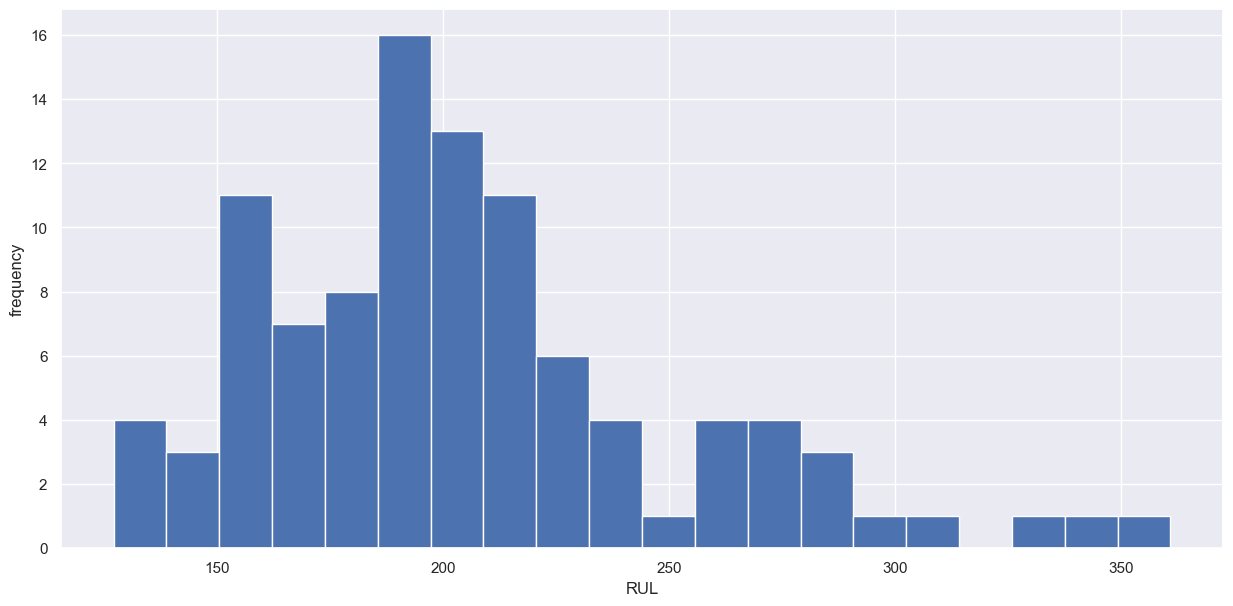

In [13]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual

df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=20, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [14]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

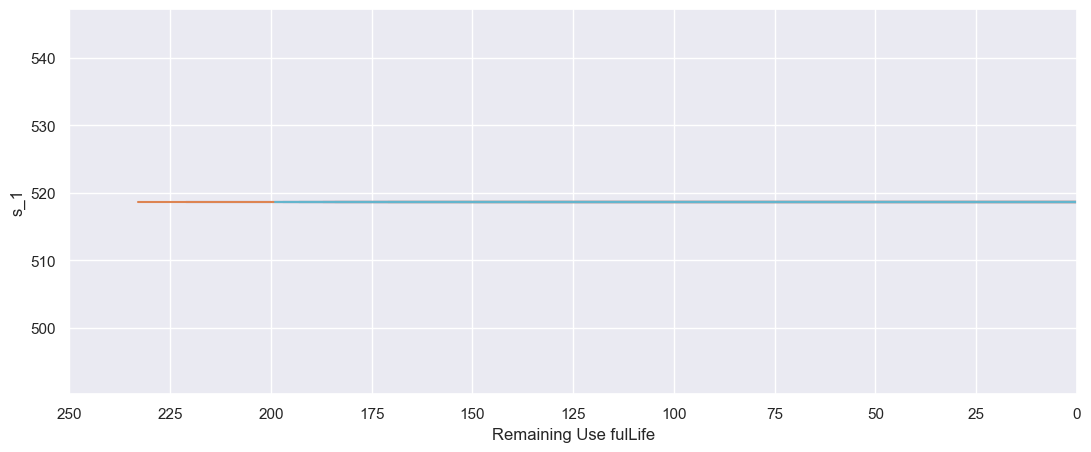

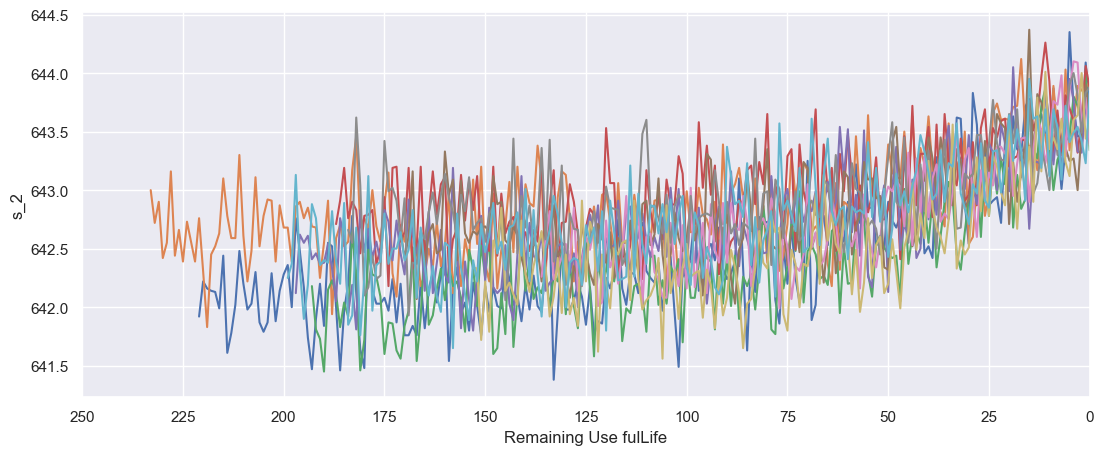

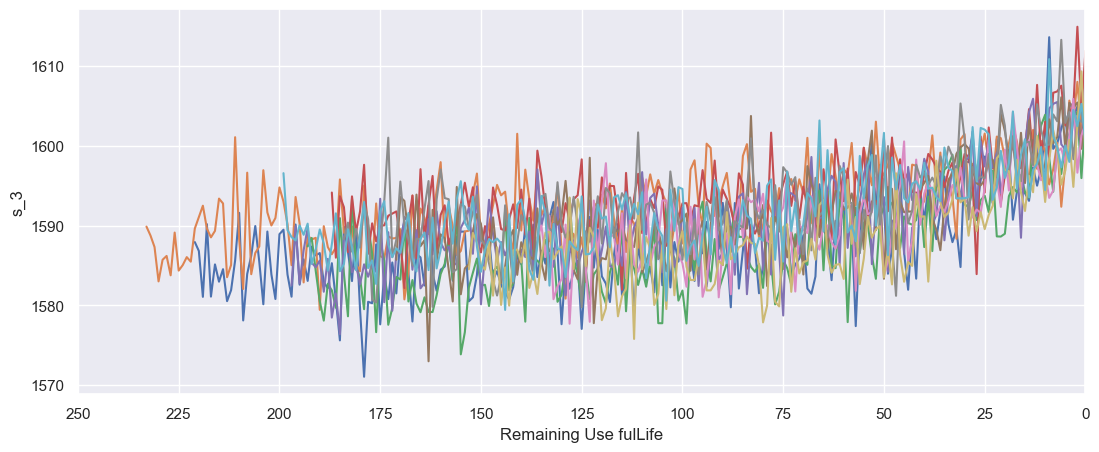

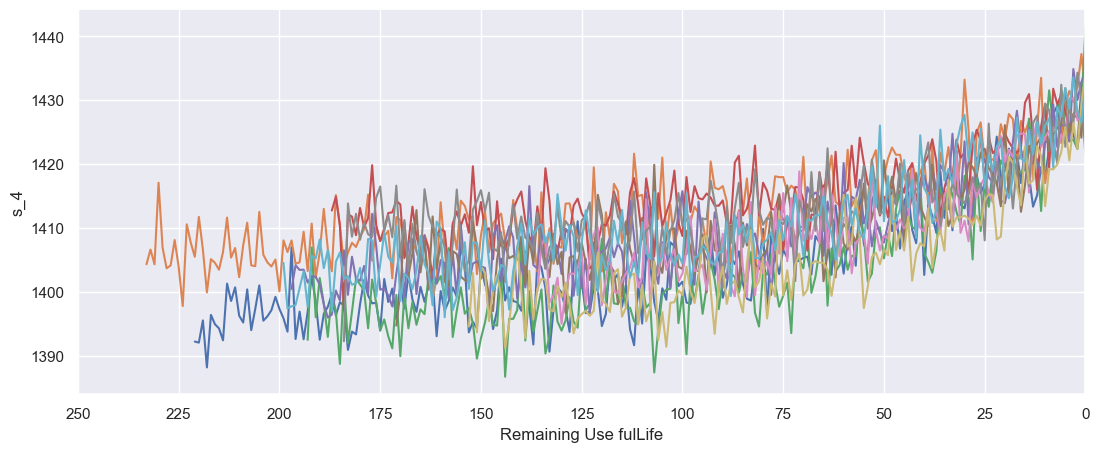

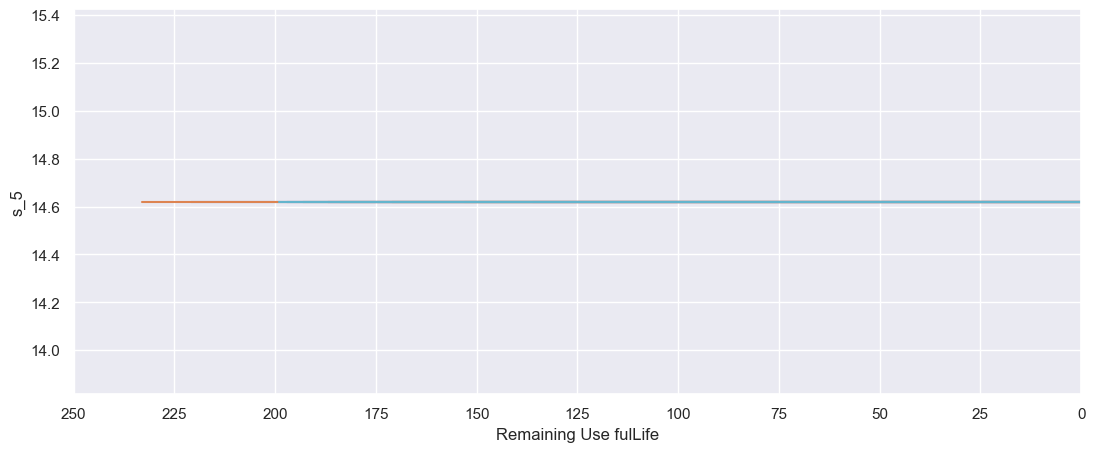

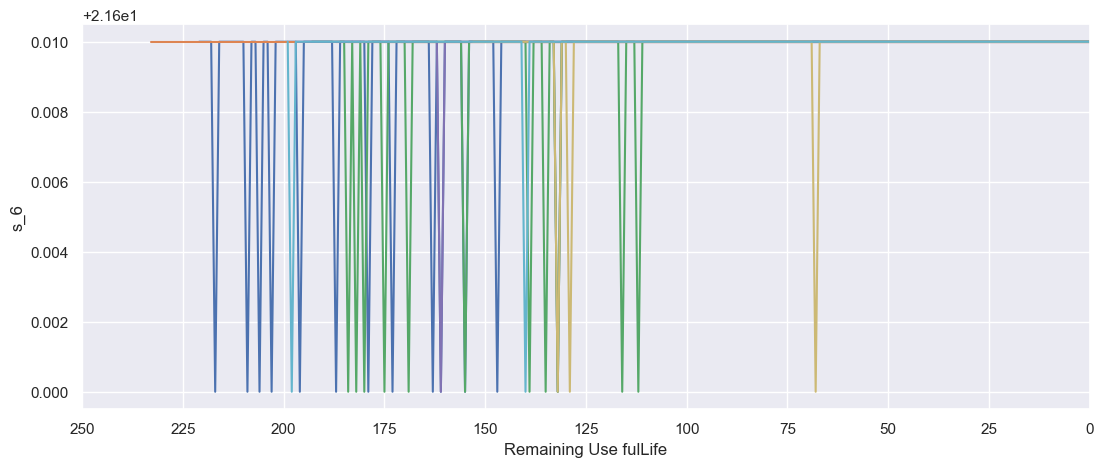

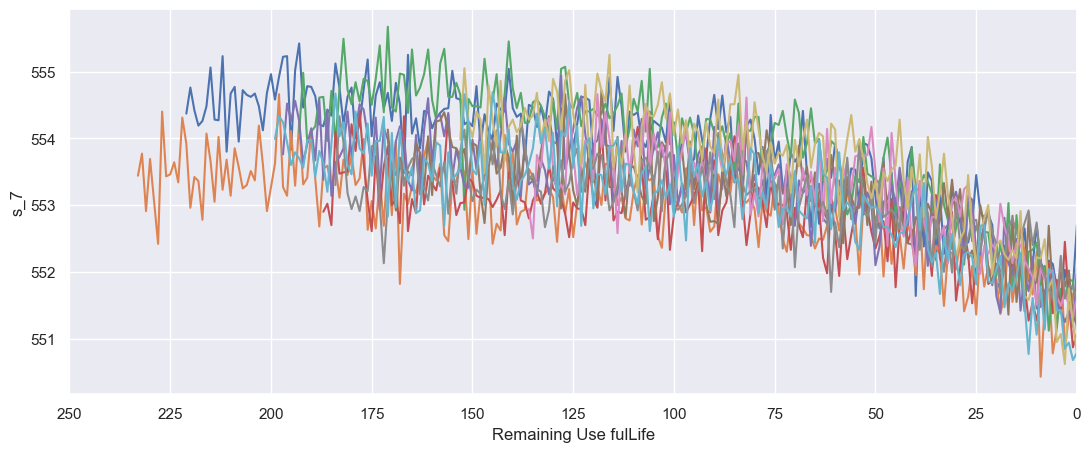

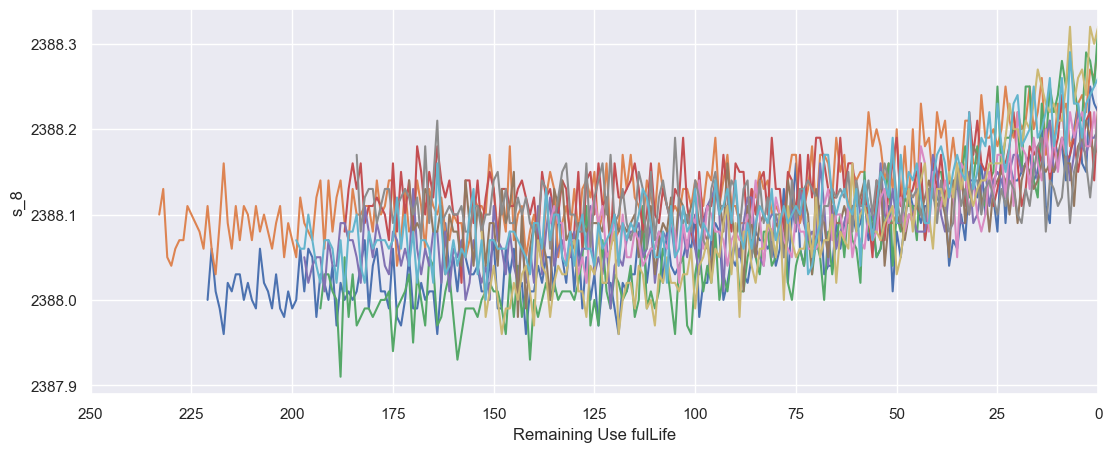

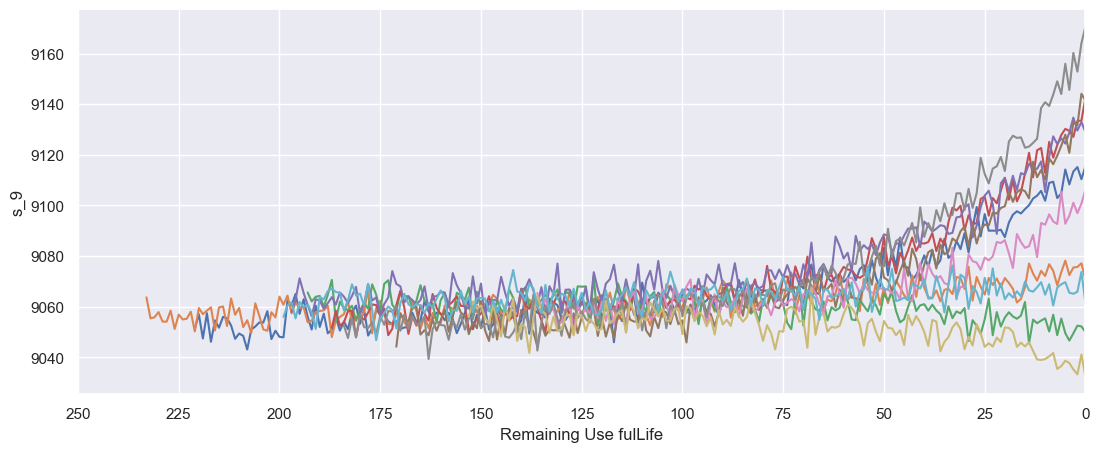

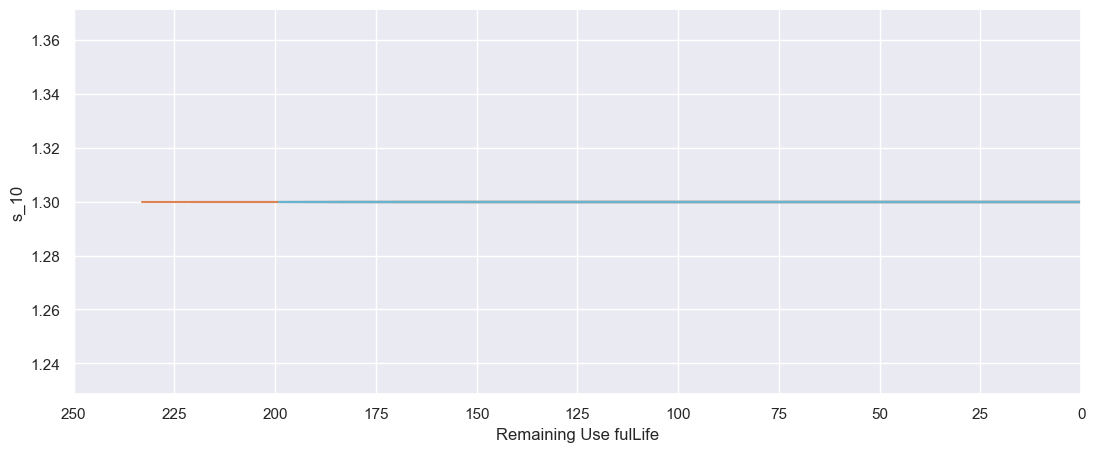

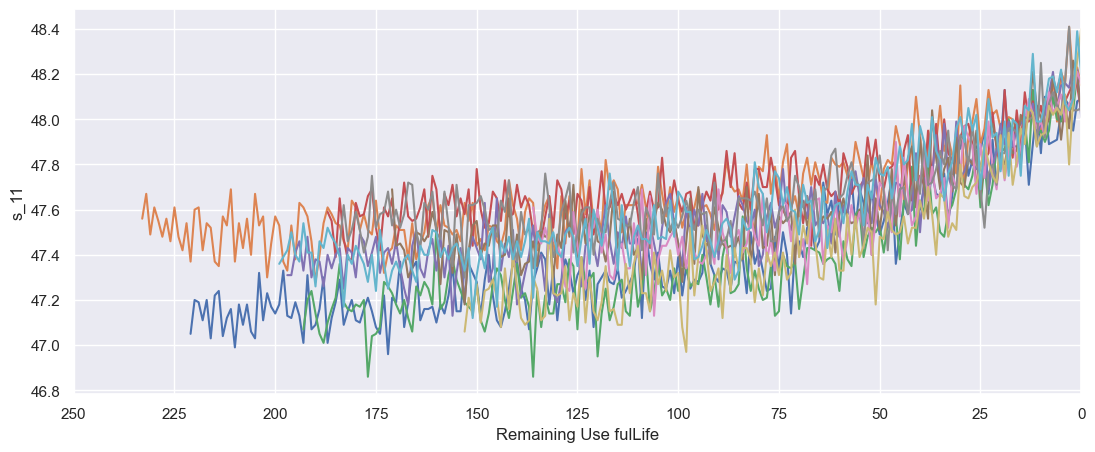

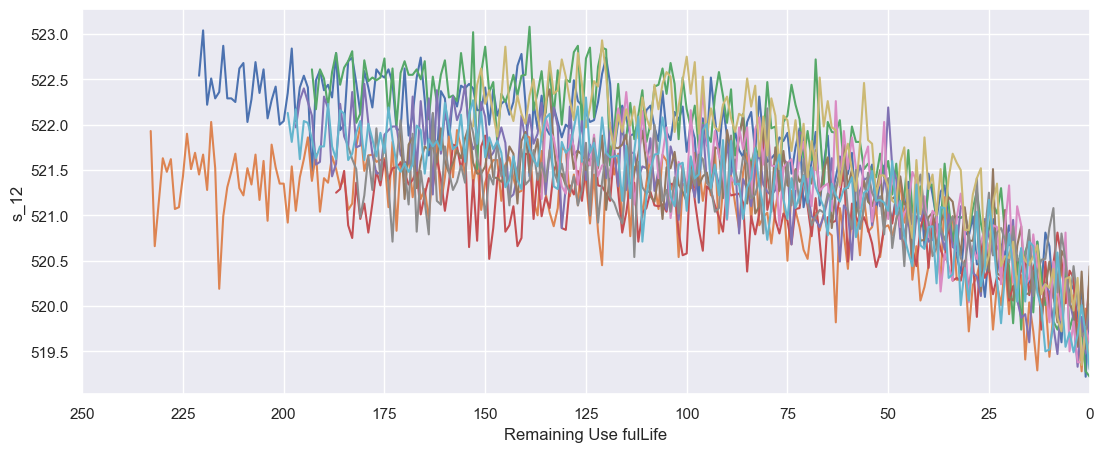

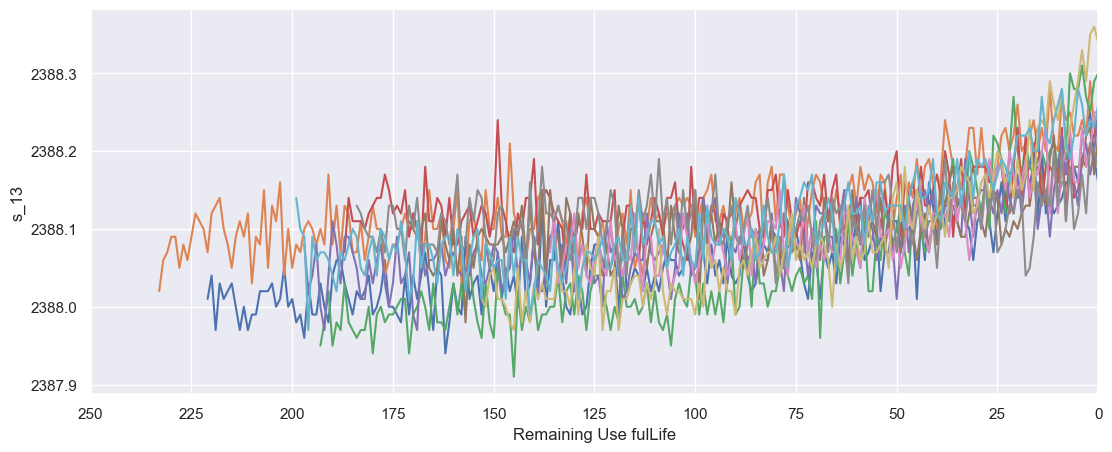

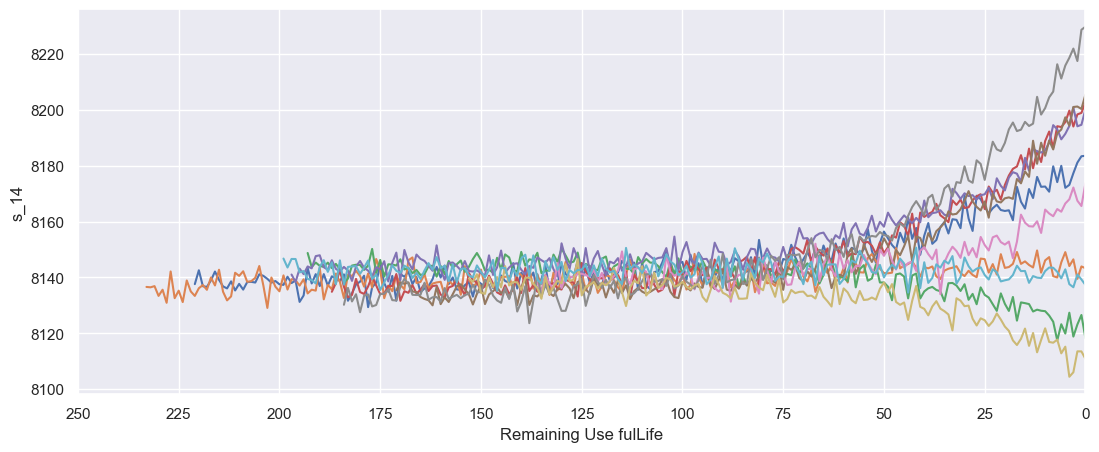

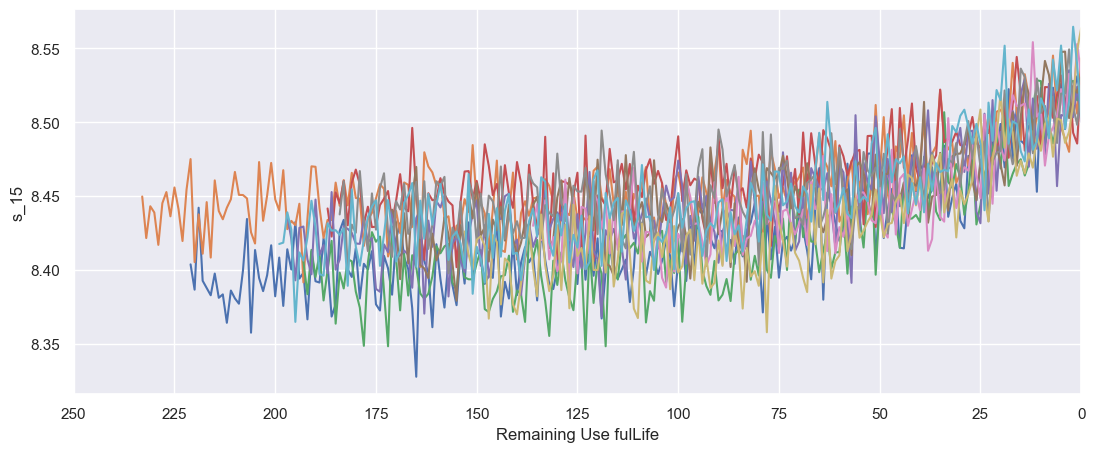

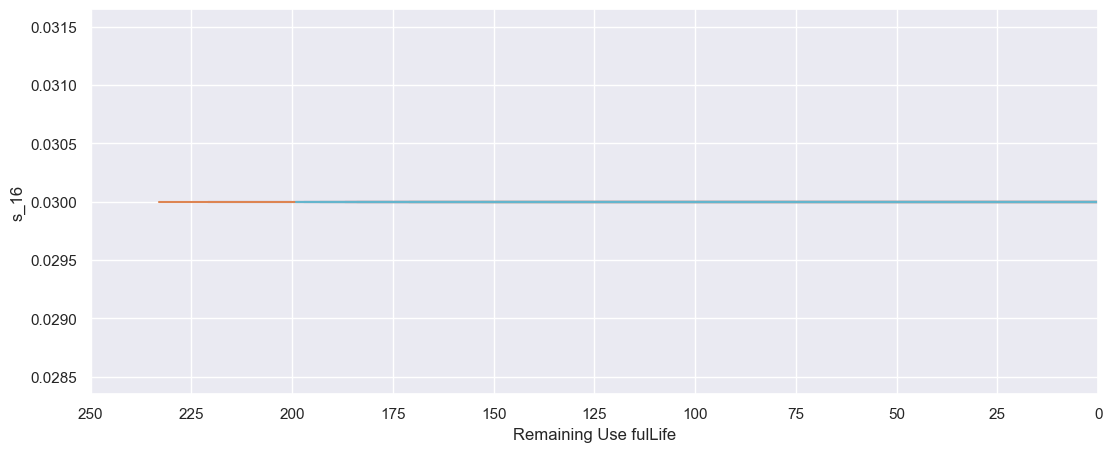

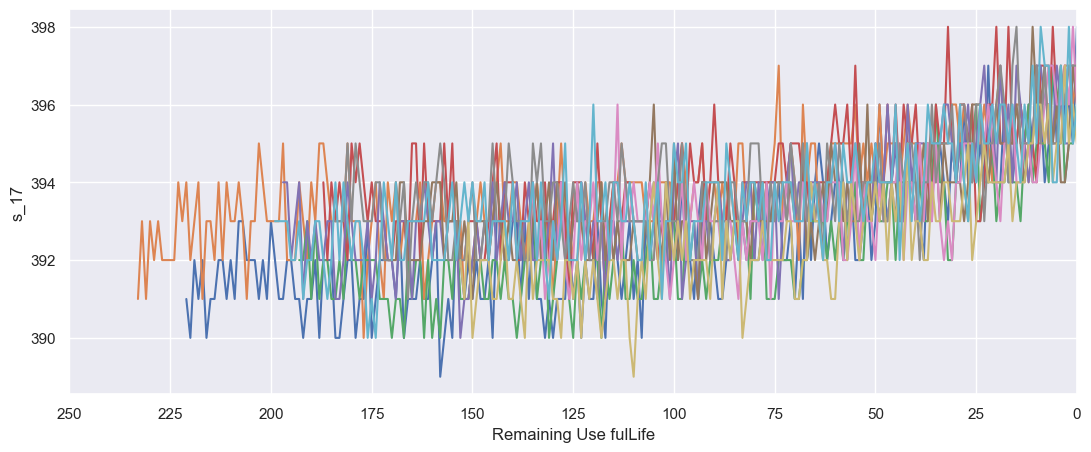

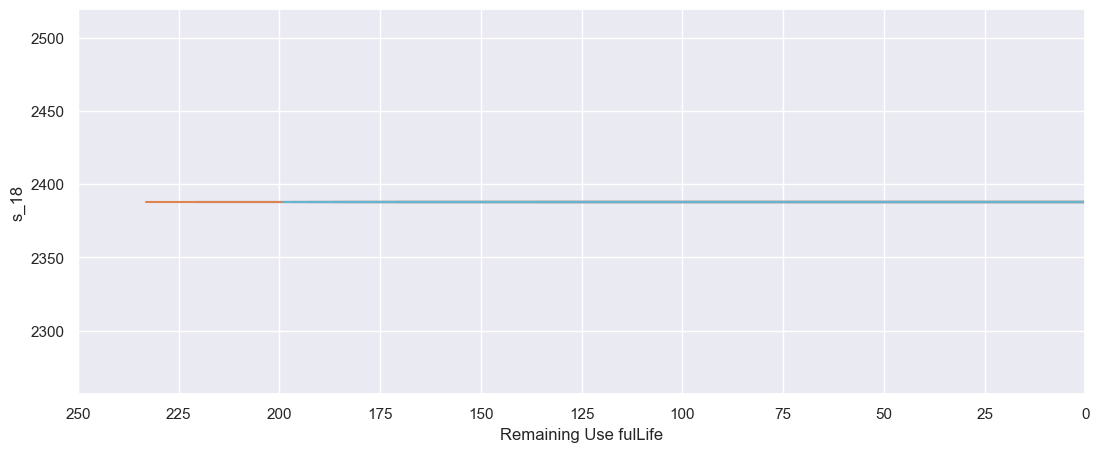

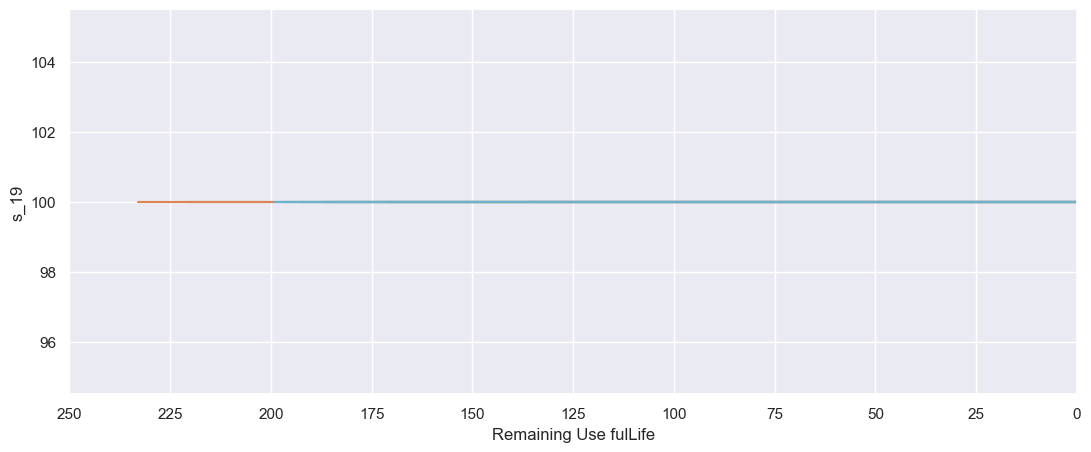

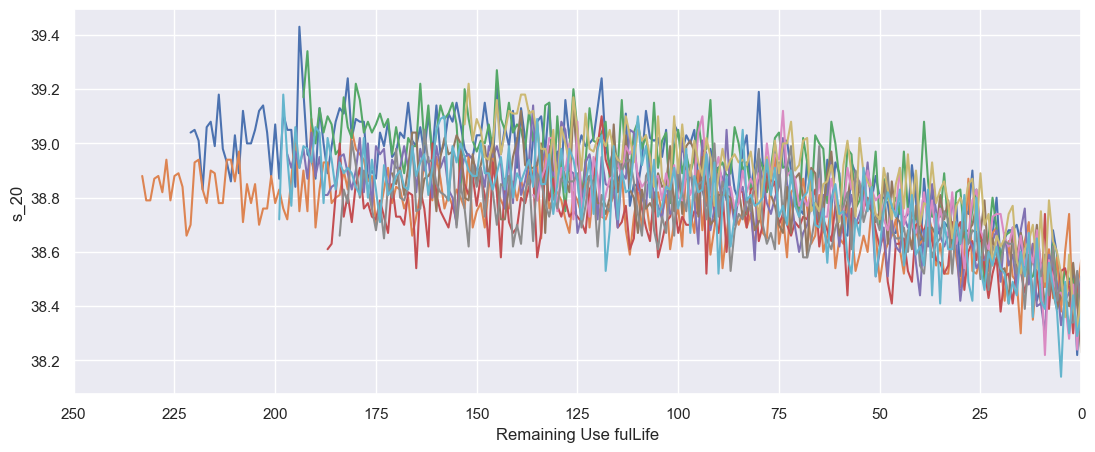

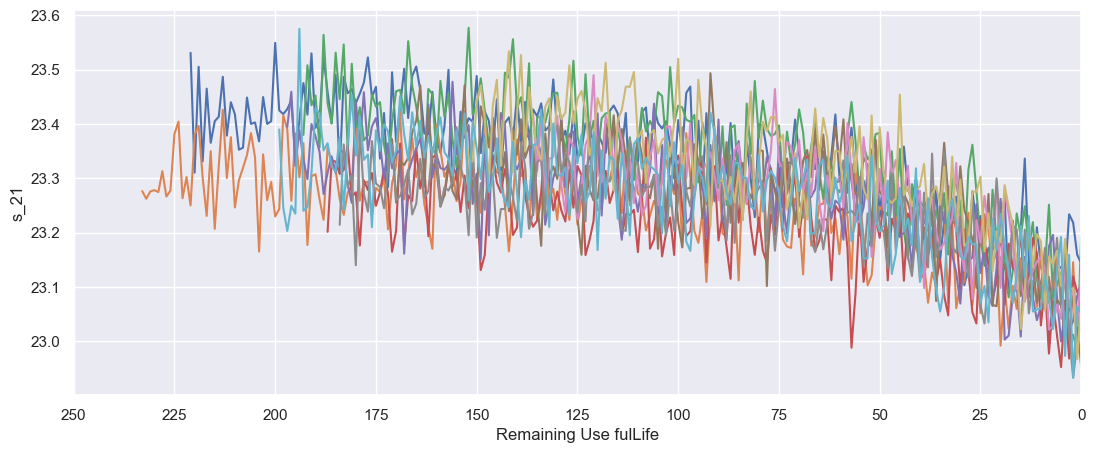

In [15]:
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [9]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [17]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']#Sensors not taken into account for the evaluation
drop_labels = index_names+setting_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [18]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66819159545424, R2:0.5794486527796772
test set RMSE:31.95263302773947, R2:0.40877368076582765


In [19]:
type(y_test)

pandas.core.frame.DataFrame

Distributed lag models

In [20]:
drop_labels1 = setting_names+drop_sensors
X_train = train.drop(drop_labels1, axis=1)
X_test_interim = test.drop(drop_labels1, axis=1)

In [21]:
# lagged variables toy example
np.random.seed(42)
toy_df = pd.DataFrame({'value': np.random.rand(5)})
toy_df['value_lag_1'] = toy_df['value'].shift(1)
toy_df['value_lag_2'] = toy_df['value'].shift(2)
display(toy_df)

value  value_lag_1  value_lag_2
0  0.374540          NaN          NaN
1  0.950714     0.374540          NaN
2  0.731994     0.950714     0.374540
3  0.598658     0.731994     0.950714
4  0.156019     0.598658     0.731994

In [22]:
# create lagged variables
remaining_sensors = X_train.columns.difference(index_names+['RUL'])
lag1 = [col + '_lag_1' for col in remaining_sensors]

X_train[lag1] = X_train.groupby('unit_nr')[remaining_sensors].shift(1)
X_train.dropna(inplace=True)

X_test_interim[lag1] = X_test_interim.groupby('unit_nr')[remaining_sensors].shift(1)
X_test_interim.dropna(inplace=True)


# target variable
y_train = X_train.pop('RUL')

# prep test data, since the true RUL values for the test set are only provided for the last time cycle
# of each enginge, the test set is subsetted to represent the same
X_test = X_test_interim.groupby('unit_nr').last().reset_index()

In [23]:
# create and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:39.367692351135105, R2:0.6709929595362321
test set RMSE:31.423109839702093, R2:0.42820706786547025


Adding lagged variables

In [24]:
def add_lagged_variables(df_input, nr_of_lags, columns):
    df = df_input.copy()
    for i in range(nr_of_lags):
        lagged_columns = [col + '_lag_{}'.format(i+1) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
    df.dropna(inplace=True)
    return df

In [25]:
def add_specific_lags(df_input, list_of_lags, columns):
    df = df_input.copy()
    for i in list_of_lags:
        lagged_columns = [col + '_lag_{}'.format(i) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i)
    df.dropna(inplace=True)
    return df

Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

test_series = train.loc[train['unit_nr']==1, 's_7']
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

single unit, single column test results
adf: -2.276666927948035 
pvalue: 0.17960380425358008
Significant: False



In [27]:
test_series = test_series.diff(1).dropna()
adf, pvalue, usedlag, n_obs, critical_values, icbest = adfuller(test_series, maxlag=1)
print('single unit, single column test results after differencing')
print('adf: {} \npvalue: {}'.format(adf, pvalue))
print('Significant: {}\n'.format(pvalue < 0.05))

single unit, single column test results after differencing
adf: -14.824168539718976 
pvalue: 1.943101859639205e-27
Significant: True



In [8]:
def find_max_diff(series):
    maxdiff = 0
    do = True
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series, maxlag=1)
    if pvalue < 0.05:
        do = False
    
    while do:
        maxdiff += 1
        adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(series.diff(maxdiff).dropna(), maxlag=1)
        if pvalue < 0.05:  # if significant, stop differencing and testing for stationarity
            do = False
    return maxdiff


def make_stationary(df_input, columns):
    df = df_input.copy()
    for unit_nr in range(1, df['unit_nr'].max()+1):
        for col in columns:
            maxdiff = find_max_diff(df.loc[df['unit_nr']==unit_nr, col])
            if maxdiff > 0:
                df.loc[df['unit_nr']==unit_nr, col] = df.loc[df['unit_nr']==unit_nr, col].diff(maxdiff)
    df.dropna(inplace=True)
    return df

In [29]:
# make all remaining sensors stationary per unit_nr
intermediate_df = train.drop(drop_labels1, axis=1)
intermediate_df = make_stationary(intermediate_df, remaining_sensors)

intermediate_df.head()  # stationary data!

unit_nr  time_cycles     s_2      s_3   s_4   s_7   s_8      s_9  s_11  \
1        1            2  642.15  1591.82  2.54 -0.61 -0.02  9044.07  0.02   
2        1            3  642.35  1587.99  1.06  0.51  0.04  9052.94 -0.22   
3        1            4  642.35  1582.79 -2.33  0.19  0.03  9049.48 -0.14   
4        1            5  642.37  1582.85  4.35 -0.45 -0.05  9055.15  0.15   
5        1            6  642.10  1584.47 -7.85  0.67 -0.04  9049.68 -0.12   

   s_12  s_13  s_14    s_15   s_17   s_20     s_21  RUL  
1  0.62  0.05 -7.13  8.4318  392.0  39.00  23.4236  190  
2  0.14 -0.04  1.74  8.4178  390.0  38.95  23.3442  189  
3  0.44  0.05  0.60  8.3682  392.0  38.88  23.3739  188  
4 -0.67 -0.04 -0.03  8.4294  393.0  38.90  23.4044  187  
5 -0.51 -0.01 -0.95  8.4108  391.0  38.98  23.3669  186

AIC: searching for the correct number of lags

In [30]:
# add lags and evaluate models to find optimal lag length
import statsmodels.api as sm

metrics = pd.DataFrame(columns=['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags+1):
    X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
    X_train = X_train.drop(index_names, axis=1)
    y_train = X_train.pop('RUL')
    
    model = sm.OLS(y_train, sm.add_constant(X_train.values))
    result = model.fit()

    metrics = pd.concat([metrics, pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
                               columns=['rmse', 'AIC', 'BIC'])],
                               ignore_index = True)

display(metrics)

C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2639410184.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics = pd.concat([metrics, pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is hig

rmse        AIC        BIC
0   51.652627  220271.65  220390.59
1   46.060503  214530.30  214760.12
2   43.058562  210753.82  211094.38
3   41.151503  207898.35  208349.51
4   39.833453  205574.27  206135.89
5   38.813294  203528.00  204199.94
6   37.986450  201667.95  202450.06
7   37.304649  199952.23  200844.37
8   36.723366  198338.72  199340.76
9   36.198014  196782.37  197894.15
10  35.717277  195272.37  196493.75
11  35.279048  193807.53  195138.36
12  34.869837  192373.83  193813.96
13  34.481184  190962.43  192511.71
14  34.096930  189555.58  191213.86
15  33.735926  188174.60  189941.74
16  33.396878  186818.44  188694.27
17  33.065376  185471.02  187455.40
18  32.737658  184128.15  186220.90
19  32.420900  182798.11  184999.09
20  32.110808  181476.10  183785.15
21  31.803284  180157.46  182574.43
22  31.502414  178846.97  181371.69
23  31.212569  177549.83  180182.14
24  30.937293  176270.33  179010.06
25  30.670196  175001.12  177848.10
26  30.407545  173737.89  176691.96
27  30.150377  172481.90  175542.91
28  29.901632  171236.72  174404.47
29  29.660232  170001.12  173275.46
30  29.420456  168768.36  172149.11

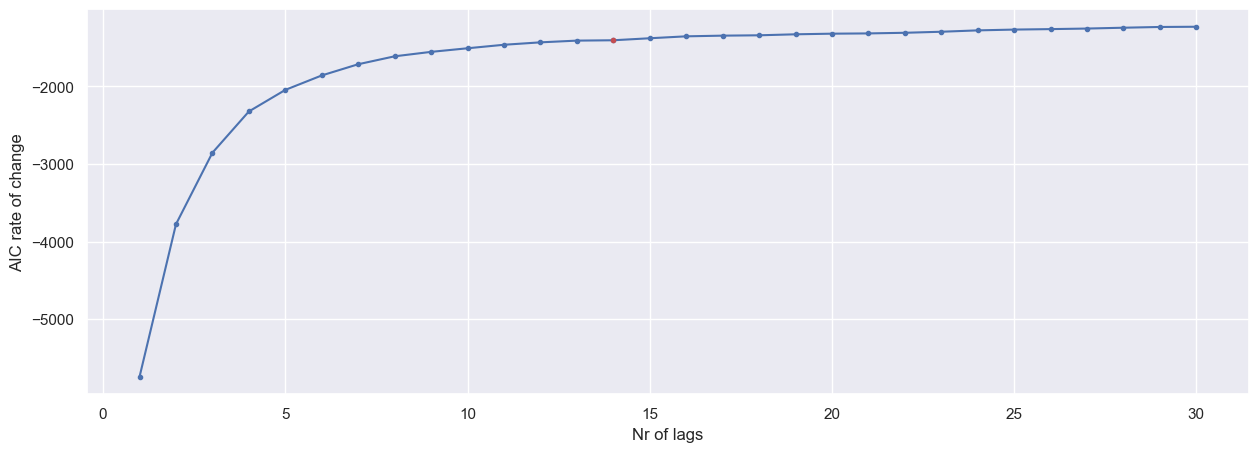

In [31]:
plt.figure(figsize=(15,5))
plt.plot(metrics['AIC'].diff(), marker='.')  # plot the difference to see where it flattens out
plt.plot(14, metrics['AIC'].diff()[14], '.r')
plt.xlabel("Nr of lags")
plt.ylabel("AIC rate of change")
plt.show()
plt.close()

Multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

# note, this takes a few minutes to calculate
vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)

C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

{'s_2': 4081069.37,
 's_3': 148827.31,
 's_4': 34450.38,
 's_7': 676636.48,
 's_8': 2591641803.36,
 's_9': 1580259.79,
 's_11': 28779.21,
 's_12': 686940.38,
 's_13': 2480791096.44,
 's_14': 1724157.4,
 's_15': 116497.33,
 's_17': 152527.42,
 's_20': 113760.29,
 's_21': 119734.69,
 'RUL': 5.11,
 's_11_lag_1': 36657.17,
 's_12_lag_1': 785930.67,
 's_13_lag_1': 2613853860.37,
 's_14_lag_1': 1926076.65,
 's_15_lag_1': 116696.91,
 's_17_lag_1': 152525.25,
 's_2_lag_1': 4074895.76,
 's_20_lag_1': 113444.5,
 's_21_lag_1': 119475.96,
 's_3_lag_1': 148979.81,
 's_4_lag_1': 38889.32,
 's_7_lag_1': 733701.46,
 's_8_lag_1': 2748462855.3,
 's_9_lag_1': 1716566.66,
 's_11_lag_2': 37805.01,
 's_12_lag_2': 780833.03,
 's_13_lag_2': 2620758747.64,
 's_14_lag_2': 1917277.53,
 's_15_lag_2': 116346.14,
 's_17_lag_2': 152686.28,
 's_2_lag_2': 4072573.42,
 's_20_lag_2': 113685.05,
 's_21_lag_2': 119653.41,
 's_3_lag_2': 149009.07,
 's_4_lag_2': 38847.79,
 's_7_lag_2': 730031.66,
 's_8_lag_2': 2753903979.86

In [33]:
from sklearn.preprocessing import StandardScaler

intermediate_df = train.drop(drop_labels1, axis=1)
scaler = StandardScaler()
scaler.fit(intermediate_df[remaining_sensors])
intermediate_df[remaining_sensors] = scaler.transform(intermediate_df[remaining_sensors])

intermediate_df = make_stationary(intermediate_df, remaining_sensors)

X_train = add_lagged_variables(intermediate_df, 14, remaining_sensors)
X_train = X_train.drop(index_names, axis=1)

vifs = {X_train.columns[i]:round(vif(X_train.values, i), 2) for i in range(len(X_train.columns))}
display(vifs)

C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

{'s_2': 2.58,
 's_3': 2.31,
 's_4': 2.09,
 's_7': 2.21,
 's_8': 2.39,
 's_9': 4.15,
 's_11': 1.9,
 's_12': 1.97,
 's_13': 2.37,
 's_14': 4.75,
 's_15': 2.55,
 's_17': 2.47,
 's_20': 2.64,
 's_21': 2.72,
 'RUL': 2.34,
 's_11_lag_1': 2.39,
 's_12_lag_1': 2.22,
 's_13_lag_1': 2.47,
 's_14_lag_1': 5.27,
 's_15_lag_1': 2.51,
 's_17_lag_1': 2.42,
 's_2_lag_1': 2.54,
 's_20_lag_1': 2.59,
 's_21_lag_1': 2.67,
 's_3_lag_1': 2.27,
 's_4_lag_1': 2.32,
 's_7_lag_1': 2.36,
 's_8_lag_1': 2.51,
 's_9_lag_1': 4.48,
 's_11_lag_2': 2.42,
 's_12_lag_2': 2.18,
 's_13_lag_2': 2.45,
 's_14_lag_2': 5.22,
 's_15_lag_2': 2.47,
 's_17_lag_2': 2.39,
 's_2_lag_2': 2.49,
 's_20_lag_2': 2.55,
 's_21_lag_2': 2.63,
 's_3_lag_2': 2.24,
 's_4_lag_2': 2.29,
 's_7_lag_2': 2.31,
 's_8_lag_2': 2.48,
 's_9_lag_2': 4.42,
 's_11_lag_3': 2.35,
 's_12_lag_3': 2.13,
 's_13_lag_3': 2.42,
 's_14_lag_3': 5.14,
 's_15_lag_3': 2.43,
 's_17_lag_3': 2.35,
 's_2_lag_3': 2.45,
 's_20_lag_3': 2.53,
 's_21_lag_3': 2.59,
 's_3_lag_3': 2.2,


# Combine, predict and evaluate

In [34]:
# add lags and evaluate models to find optimal lag length
import statsmodels.api as sm

metrics = pd.DataFrame(columns=['rmse', 'AIC', 'BIC'])
nr_of_lags = 30
for i in range(0, nr_of_lags+1):
    X_train = add_lagged_variables(intermediate_df, i, remaining_sensors)
    X_train = X_train.drop(index_names, axis=1)
    y_train = X_train.pop('RUL')
    
    model = sm.OLS(y_train, sm.add_constant(X_train.values))
    result = model.fit()

    metrics = pd.concat([metrics, pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
                               columns=['rmse', 'AIC', 'BIC'])],
                               ignore_index = True)

display(metrics)

C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2639410184.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics = pd.concat([metrics, pd.DataFrame(data=[[np.sqrt(result.mse_resid), round(result.aic,2), round(result.bic,2)]],
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is hig

rmse        AIC        BIC
0   45.311459  214892.78  215011.72
1   43.199826  211909.99  212139.82
2   42.321539  210051.72  210392.28
3   41.806392  208537.26  208988.42
4   41.449199  207175.30  207736.92
5   41.159315  205879.37  206551.31
6   40.908577  204622.43  205404.54
7   40.677353  203385.46  204277.60
8   40.459553  202162.57  203164.60
9   40.246294  200945.11  202056.89
10  40.032297  199727.93  200949.31
11  39.807564  198501.28  199832.11
12  39.569598  197262.72  198702.85
13  39.331775  196025.28  197574.57
14  39.086446  194781.51  196439.79
15  38.832622  193530.39  195297.52
16  38.565998  192267.69  194143.52
17  38.276907  190983.82  192968.19
18  37.984763  189697.81  191790.56
19  37.692030  188412.06  190613.04
20  37.397693  187125.56  189434.62
21  37.094592  185831.20  188248.16
22  36.786163  184532.32  187057.03
23  36.474461  183230.92  185863.23
24  36.159212  181926.72  184666.44
25  35.832347  180611.53  183458.52
26  35.502479  179293.95  182248.03
27  35.178855  177983.30  181044.31
28  34.850913  176668.91  179836.67
29  34.532843  175365.21  178639.55
30  34.218579  174066.08  177446.83

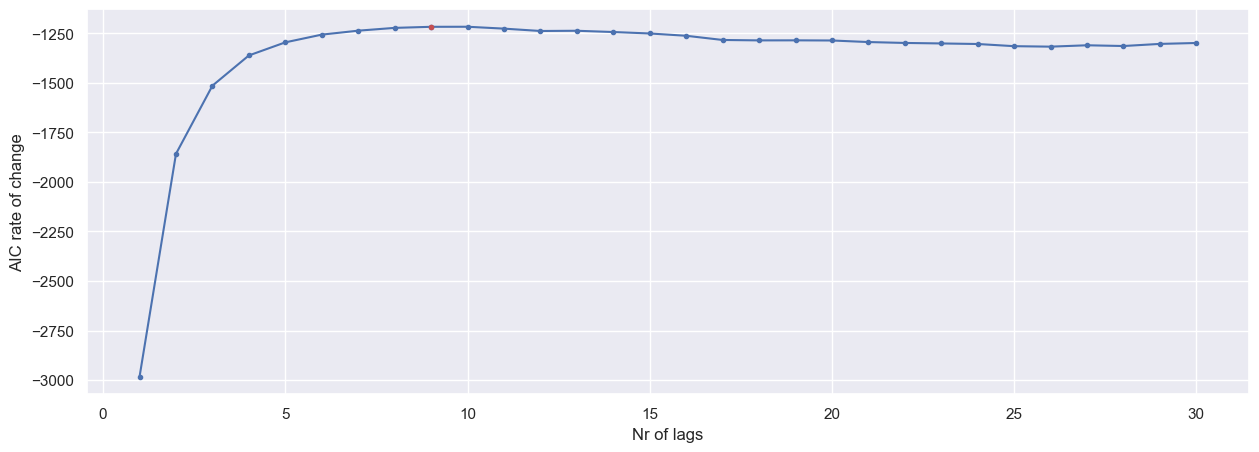

In [35]:
plt.figure(figsize=(15,5))
plt.plot(metrics['AIC'].diff(), marker='.')  # plot the difference to see where it flattens out
plt.plot(9, metrics['AIC'].diff()[9], '.r')
plt.xlabel("Nr of lags")
plt.ylabel("AIC rate of change")
plt.show()
plt.close()

# lag 9 

In [36]:
# train and evaluate model with 0 to n lags
lags = 9

# prep data
X_train_interim = train.drop(drop_labels1, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_lagged_variables(X_train_interim, lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels1, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_lagged_variables(X_test_interim, lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)  # apply clipped RUL from last post
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i+1)
C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2569844278.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

train set RMSE:20.80233928213837, R2:0.7523208224684113
test set RMSE:21.148958570123995, R2:0.740988868759505


# train and evaluate model with specific lags

In [37]:
specific_lags = [1,2,3,4,5,10,20]

# prep data
X_train_interim = train.drop(drop_labels1, axis=1)
X_train_interim[remaining_sensors] = scaler.transform(X_train_interim[remaining_sensors])
X_train_interim = make_stationary(X_train_interim, remaining_sensors)
X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_train_interim = sm.add_constant(X_train_interim)
X_train = X_train_interim.drop(index_names, axis=1)
y_train = X_train.pop("RUL")

X_test_interim = test.drop(drop_labels1, axis=1)
X_test_interim[remaining_sensors] = scaler.transform(X_test_interim[remaining_sensors])
X_test_interim = make_stationary(X_test_interim, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)
X_test_interim = X_test_interim.groupby('unit_nr').last().reset_index()
X_test_interim = sm.add_constant(X_test_interim)
X_test = X_test_interim.drop(index_names, axis=1)

# fit model
model = sm.OLS(y_train.clip(upper=125), X_train)
model_fitted = model.fit()

# predict
y_hat_train = model_fitted.predict(X_train)
y_hat = model_fitted.predict(X_test)

# evaluate
evaluate(y_train.clip(upper=125), y_hat_train, 'train')
evaluate(y_test, y_hat)

train set RMSE:20.742950740267165, R2:0.7542608298904978
test set RMSE:20.852234864407475, R2:0.7482058292992066


# LTSM

In [38]:
remaining_sensors

Index(['s_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_2', 's_20', 's_21',
       's_3', 's_4', 's_7', 's_8', 's_9'],
      dtype='object')

In [39]:
drop_sensors

['s_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']

Preparación de datos


FIRST LSTM

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Cargar datos
train_data_path = "train_FD001.txt"
test_data_path = "test_FD001.txt"
rul_data_path = "RUL_FD001.txt"

column_names = ['unit', 'time', 'op1', 'op2', 'op3'] + [f's_{i}' for i in range(1, 22)]
train_data = pd.read_csv(dir_path+train_data_path, sep=' ', header=None, names=column_names, index_col=False)
train_data.drop(columns=[col for col in train_data.columns if 'Unnamed' in col], inplace=True)

# Normalización de los datos
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data.drop(columns=['unit', 'time']))

# Convertir de nuevo en DataFrame para manejar los datos fácilmente
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns[2:])

# Agregar 'unit' y 'time' para agrupar posteriormente
train_data_scaled['unit'] = train_data['unit']
train_data_scaled['time'] = train_data['time']


C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\2690735557.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data = pd.read_csv(dir_path+train_data_path, sep=' ', header=None, names=column_names, index_col=False)


In [41]:
train_data_scaled

op1       op2  op3  s_1       s_2       s_3       s_4  s_5  s_6  \
0      0.459770  0.166667  0.0  0.0  0.183735  0.406802  0.309757  0.0  1.0   
1      0.609195  0.250000  0.0  0.0  0.283133  0.453019  0.352633  0.0  1.0   
2      0.252874  0.750000  0.0  0.0  0.343373  0.369523  0.370527  0.0  1.0   
3      0.540230  0.500000  0.0  0.0  0.343373  0.256159  0.331195  0.0  1.0   
4      0.390805  0.333333  0.0  0.0  0.349398  0.257467  0.404625  0.0  1.0   
...         ...       ...  ...  ...       ...       ...       ...  ...  ...   
20626  0.477011  0.250000  0.0  0.0  0.686747  0.587312  0.782917  0.0  1.0   
20627  0.408046  0.083333  0.0  0.0  0.701807  0.729453  0.866475  0.0  1.0   
20628  0.522989  0.500000  0.0  0.0  0.665663  0.684979  0.775321  0.0  1.0   
20629  0.436782  0.750000  0.0  0.0  0.608434  0.746021  0.747468  0.0  1.0   
20630  0.316092  0.083333  0.0  0.0  0.795181  0.639634  0.842167  0.0  1.0   

            s_7  ...      s_14      s_15  s_16      s_17  s_18  s_19  \
0      0.726248  ...  0.199608  0.363986   0.0  0.333333   0.0   0.0   
1      0.628019  ...  0.162813  0.411312   0.0  0.333333   0.0   0.0   
2      0.710145  ...  0.171793  0.357445   0.0  0.166667   0.0   0.0   
3      0.740741  ...  0.174889  0.166603   0.0  0.333333   0.0   0.0   
4      0.668277  ...  0.174734  0.402078   0.0  0.416667   0.0   0.0   
...         ...  ...       ...       ...   ...       ...   ...   ...   
20626  0.254428  ...  0.194344  0.656791   0.0  0.750000   0.0   0.0   
20627  0.162641  ...  0.188668  0.727203   0.0  0.583333   0.0   0.0   
20628  0.175523  ...  0.212148  0.922278   0.0  0.833333   0.0   0.0   
20629  0.133655  ...  0.203065  0.823394   0.0  0.583333   0.0   0.0   
20630  0.151369  ...  0.192951  0.687572   0.0  0.666667   0.0   0.0   

           s_20      s_21  unit  time  
0      0.713178  0.724662     1     1  
1      0.666667  0.731014     1     2  
2      0.627907  0.621375     1     3  
3      0.573643  0.662386     1     4  
4      0.589147  0.704502     1     5  
...         ...       ...   ...   ...  
20626  0.271318  0.109500   100   196  
20627  0.124031  0.366197   100   197  
20628  0.232558  0.053991   100   198  
20629  0.116279  0.234466   100   199  
20630  0.178295  0.218172   100   200  

[20631 rows x 26 columns]

Paso 2: Etiquetado de la Remaining Useful Life (RUL)
El siguiente paso es crear las etiquetas de RUL para cada motor.

In [42]:
# Calcular RUL para cada motor en el conjunto de entrenamiento
rul = pd.DataFrame(train_data_scaled.groupby('unit')['time'].max()).reset_index()
rul.columns = ['unit', 'max_time']

# Unir con el dataset original para calcular RUL
train_data_scaled = train_data_scaled.merge(rul, on=['unit'], how='left')
train_data_scaled['RUL'] = train_data_scaled['max_time'] - train_data_scaled['time']
train_data_scaled.drop(columns=['max_time'], inplace=True)

# Normalizar RUL para un modelo más estable (opcional)
rul_max = 130  # Limitar RUL a un valor máximo
train_data_scaled['RUL'] = np.clip(train_data_scaled['RUL'], 0, rul_max)


In [43]:
train_data_scaled[train_data_scaled['unit']==1]

op1       op2  op3  s_1       s_2       s_3       s_4  s_5  s_6  \
0    0.459770  0.166667  0.0  0.0  0.183735  0.406802  0.309757  0.0  1.0   
1    0.609195  0.250000  0.0  0.0  0.283133  0.453019  0.352633  0.0  1.0   
2    0.252874  0.750000  0.0  0.0  0.343373  0.369523  0.370527  0.0  1.0   
3    0.540230  0.500000  0.0  0.0  0.343373  0.256159  0.331195  0.0  1.0   
4    0.390805  0.333333  0.0  0.0  0.349398  0.257467  0.404625  0.0  1.0   
..        ...       ...  ...  ...       ...       ...       ...  ...  ...   
187  0.114943  0.750000  0.0  0.0  0.765060  0.683235  0.684166  0.0  1.0   
188  0.465517  0.666667  0.0  0.0  0.894578  0.547853  0.772451  0.0  1.0   
189  0.344828  0.583333  0.0  0.0  0.731928  0.614345  0.737677  0.0  1.0   
190  0.500000  0.166667  0.0  0.0  0.641566  0.682799  0.734639  0.0  1.0   
191  0.551724  0.500000  0.0  0.0  0.701807  0.662089  0.758778  0.0  1.0   

          s_7  ...      s_15  s_16      s_17  s_18  s_19      s_20      s_21  \
0    0.726248  ...  0.363986   0.0  0.333333   0.0   0.0  0.713178  0.724662   
1    0.628019  ...  0.411312   0.0  0.333333   0.0   0.0  0.666667  0.731014   
2    0.710145  ...  0.357445   0.0  0.166667   0.0   0.0  0.627907  0.621375   
3    0.740741  ...  0.166603   0.0  0.333333   0.0   0.0  0.573643  0.662386   
4    0.668277  ...  0.402078   0.0  0.416667   0.0   0.0  0.589147  0.704502   
..        ...  ...       ...   ...       ...   ...   ...       ...       ...   
187  0.336554  ...  0.753367   0.0  0.666667   0.0   0.0  0.286822  0.089202   
188  0.136876  ...  0.744132   0.0  0.583333   0.0   0.0  0.263566  0.301712   
189  0.231884  ...  0.759523   0.0  0.833333   0.0   0.0  0.271318  0.239299   
190  0.172303  ...  0.740669   0.0  0.500000   0.0   0.0  0.240310  0.324910   
191  0.225443  ...  0.717199   0.0  0.666667   0.0   0.0  0.263566  0.097625   

     unit  time  RUL  
0       1     1  130  
1       1     2  130  
2       1     3  130  
3       1     4  130  
4       1     5  130  
..    ...   ...  ...  
187     1   188    4  
188     1   189    3  
189     1   190    2  
190     1   191    1  
191     1   192    0  

[192 rows x 27 columns]

In [44]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']#Sensors not taken into account for the evaluation
index_names = ['time']
setting_names = ['op1', 'op2', 'op3']
drop_labels2 = index_names+setting_names+drop_sensors
train_data_scaled = train_data_scaled.drop(drop_labels2, axis=1)

In [45]:
train_data_scaled

s_2       s_3       s_4       s_7       s_8       s_9      s_11  \
0      0.183735  0.406802  0.309757  0.726248  0.242424  0.109755  0.369048   
1      0.283133  0.453019  0.352633  0.628019  0.212121  0.100242  0.380952   
2      0.343373  0.369523  0.370527  0.710145  0.272727  0.140043  0.250000   
3      0.343373  0.256159  0.331195  0.740741  0.318182  0.124518  0.166667   
4      0.349398  0.257467  0.404625  0.668277  0.242424  0.149960  0.255952   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.686747  0.587312  0.782917  0.254428  0.439394  0.196491  0.726190   
20627  0.701807  0.729453  0.866475  0.162641  0.500000  0.194651  0.708333   
20628  0.665663  0.684979  0.775321  0.175523  0.515152  0.198196  0.738095   
20629  0.608434  0.746021  0.747468  0.133655  0.530303  0.233285  0.916667   
20630  0.795181  0.639634  0.842167  0.151369  0.545455  0.178363  0.803571   

           s_12      s_13      s_14      s_15      s_17      s_20      s_21  \
0      0.633262  0.205882  0.199608  0.363986  0.333333  0.713178  0.724662   
1      0.765458  0.279412  0.162813  0.411312  0.333333  0.666667  0.731014   
2      0.795309  0.220588  0.171793  0.357445  0.166667  0.627907  0.621375   
3      0.889126  0.294118  0.174889  0.166603  0.333333  0.573643  0.662386   
4      0.746269  0.235294  0.174734  0.402078  0.416667  0.589147  0.704502   
...         ...       ...       ...       ...       ...       ...       ...   
20626  0.170576  0.558824  0.194344  0.656791  0.750000  0.271318  0.109500   
20627  0.211087  0.500000  0.188668  0.727203  0.583333  0.124031  0.366197   
20628  0.281450  0.529412  0.212148  0.922278  0.833333  0.232558  0.053991   
20629  0.208955  0.514706  0.203065  0.823394  0.583333  0.116279  0.234466   
20630  0.130064  0.558824  0.192951  0.687572  0.666667  0.178295  0.218172   

       unit  RUL  
0         1  130  
1         1  130  
2         1  130  
3         1  130  
4         1  130  
...     ...  ...  
20626   100    4  
20627   100    3  
20628   100    2  
20629   100    1  
20630   100    0  

[20631 rows x 16 columns]

Paso 3: Preparar las secuencias para el modelo LSTM
El modelo LSTM necesita los datos como secuencias temporales, por lo que debes organizar los datos en forma de ventanas deslizantes para cada unidad.

In [46]:
# Crear secuencias de datos (ventanas temporales)
def create_sequences(data, seq_length, features):
    X = []
    y = []
    for unit in data['unit'].unique():
        unit_data = data[data['unit'] == unit]
        for start in range(len(unit_data) - seq_length):
            X.append(unit_data[features].iloc[start:start + seq_length].values)
            y.append(unit_data['RUL'].iloc[start + seq_length - 1])
    return np.array(X), np.array(y)

# Definir características y longitud de secuencia
sequence_length = 30
features = train_data_scaled.columns[:-2]  # Excluyendo 'unit', 'time', 'RUL'

# Crear las secuencias
X_train, y_train = create_sequences(train_data_scaled, sequence_length, features)


In [47]:
# Crear el modelo LSTM
model = Sequential()

# Añadir capas LSTM
model.add(LSTM(units=100, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)


c:\Users\equipo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 7148.1738 - val_loss: 6429.3906
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5373.4082 - val_loss: 5131.1997
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 4346.8687 - val_loss: 4166.4932
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 3535.2253 - val_loss: 3450.0176
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 2883.9998 - val_loss: 2929.7212
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 2543.6628 - val_loss: 2567.1118
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 2248.7146 - val_loss: 2320.5420
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 2080.7590 - val_loss: 2160.3477
Epoch 9/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 1965.0452 - val_loss: 2061.6621
Epoch 10/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 1913.4634 - val_loss: 2002.2566
Epoch 11/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 19

Paso 5: Evaluar el modelo
Una vez entrenado, puedes evaluar el modelo con el conjunto de prueba (test).

In [48]:
# Cargar datos de prueba y seguir los mismos pasos de preprocesamiento
test_data = pd.read_csv(dir_path+test_data_path, sep=' ', header=None, names=column_names, index_col=False)
test_data.drop(columns=[col for col in test_data.columns if 'Unnamed' in col], inplace=True)


C:\Users\equipo\AppData\Local\Temp\ipykernel_23508\661765968.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_data = pd.read_csv(dir_path+test_data_path, sep=' ', header=None, names=column_names, index_col=False)


In [49]:
test_data.head()

unit  time     op1     op2    op3     s_1     s_2      s_3      s_4    s_5  \
0     1     1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1     1     2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2     1     3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3     1     4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4     1     5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20  \
0  ...  521.72  2388.03  8125.55  8.4052  0.03   392  2388  100.0  38.86   
1  ...  522.16  2388.06  8139.62  8.3803  0.03   393  2388  100.0  39.02   
2  ...  521.97  2388.03  8130.10  8.4441  0.03   393  2388  100.0  39.08   
3  ...  521.38  2388.05  8132.90  8.3917  0.03   391  2388  100.0  39.00   
4  ...  522.15  2388.03  8129.54  8.4031  0.03   390  2388  100.0  38.99   

      s_21  
0  23.3735  
1  23.3916  
2  23.4166  
3  23.3737  
4  23.4130  

[5 rows x 26 columns]

In [50]:
test_data

unit  time     op1     op2    op3     s_1     s_2      s_3      s_4  \
0         1     1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21   
1         1     2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42   
2         1     3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34   
3         1     4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42   
4         1     5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92   
...     ...   ...     ...     ...    ...     ...     ...      ...      ...   
13091   100   194  0.0049  0.0000  100.0  518.67  643.24  1599.45  1415.79   
13092   100   195 -0.0011 -0.0001  100.0  518.67  643.22  1595.69  1422.05   
13093   100   196 -0.0006 -0.0003  100.0  518.67  643.44  1593.15  1406.82   
13094   100   197 -0.0038  0.0001  100.0  518.67  643.26  1594.99  1419.36   
13095   100   198  0.0013  0.0003  100.0  518.67  642.95  1601.62  1424.99   

         s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19  \
0      14.62  ...  521.72  2388.03  8125.55  8.4052  0.03   392  2388  100.0   
1      14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   393  2388  100.0   
2      14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   393  2388  100.0   
3      14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   391  2388  100.0   
4      14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   390  2388  100.0   
...      ...  ...     ...      ...      ...     ...   ...   ...   ...    ...   
13091  14.62  ...  520.69  2388.00  8213.28  8.4715  0.03   394  2388  100.0   
13092  14.62  ...  521.05  2388.09  8210.85  8.4512  0.03   395  2388  100.0   
13093  14.62  ...  521.18  2388.04  8217.24  8.4569  0.03   395  2388  100.0   
13094  14.62  ...  521.33  2388.08  8220.48  8.4711  0.03   395  2388  100.0   
13095  14.62  ...  521.07  2388.05  8214.64  8.4903  0.03   396  2388  100.0   

        s_20     s_21  
0      38.86  23.3735  
1      39.02  23.3916  
2      39.08  23.4166  
3      39.00  23.3737  
4      38.99  23.4130  
...      ...      ...  
13091  38.65  23.1974  
13092  38.57  23.2771  
13093  38.62  23.2051  
13094  38.66  23.2699  
13095  38.70  23.1855  

[13096 rows x 26 columns]

In [51]:
test_data_scaled = scaler.transform(test_data.drop(columns=['unit', 'time']))
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns[2:])
test_data_scaled['unit'] = test_data['unit']
test_data_scaled['time'] = test_data['time']

test_data_scaled

op1       op2  op3  s_1       s_2       s_3       s_4  s_5  s_6  \
0      0.632184  0.750000  0.0  0.0  0.545181  0.310661  0.269413  0.0  1.0   
1      0.344828  0.250000  0.0  0.0  0.150602  0.379551  0.222316  0.0  1.0   
2      0.517241  0.583333  0.0  0.0  0.376506  0.346632  0.322248  0.0  1.0   
3      0.741379  0.500000  0.0  0.0  0.370482  0.285154  0.408001  0.0  1.0   
4      0.580460  0.500000  0.0  0.0  0.391566  0.352082  0.332039  0.0  1.0   
...         ...       ...  ...  ...       ...       ...       ...  ...  ...   
13091  0.781609  0.500000  0.0  0.0  0.611446  0.619359  0.566172  0.0  1.0   
13092  0.436782  0.416667  0.0  0.0  0.605422  0.537388  0.671843  0.0  1.0   
13093  0.465517  0.250000  0.0  0.0  0.671687  0.482014  0.414754  0.0  1.0   
13094  0.281609  0.583333  0.0  0.0  0.617470  0.522128  0.626435  0.0  1.0   
13095  0.574713  0.750000  0.0  0.0  0.524096  0.666667  0.721472  0.0  1.0   

            s_7  ...      s_14      s_15  s_16      s_17  s_18  s_19  \
0      0.652174  ...  0.132160  0.308965   0.0  0.333333   0.0   0.0   
1      0.805153  ...  0.204768  0.213159   0.0  0.416667   0.0   0.0   
2      0.685990  ...  0.155640  0.458638   0.0  0.416667   0.0   0.0   
3      0.679549  ...  0.170090  0.257022   0.0  0.250000   0.0   0.0   
4      0.694042  ...  0.152751  0.300885   0.0  0.166667   0.0   0.0   
...         ...  ...       ...       ...   ...       ...   ...   ...   
13091  0.573269  ...  0.584890  0.564063   0.0  0.500000   0.0   0.0   
13092  0.542673  ...  0.572350  0.485956   0.0  0.583333   0.0   0.0   
13093  0.513688  ...  0.605326  0.507888   0.0  0.583333   0.0   0.0   
13094  0.566828  ...  0.622046  0.562524   0.0  0.583333   0.0   0.0   
13095  0.423510  ...  0.591908  0.636399   0.0  0.666667   0.0   0.0   

           s_20      s_21  unit  time  
0      0.558140  0.661834     1     1  
1      0.682171  0.686827     1     2  
2      0.728682  0.721348     1     3  
3      0.666667  0.662110     1     4  
4      0.658915  0.716377     1     5  
...         ...       ...   ...   ...  
13091  0.395349  0.418669   100   194  
13092  0.333333  0.528721   100   195  
13093  0.372093  0.429301   100   196  
13094  0.403101  0.518779   100   197  
13095  0.434109  0.402237   100   198  

[13096 rows x 26 columns]

In [52]:
# Obtener RUL real de test
true_rul = pd.read_csv(dir_path+rul_data_path, header=None)
true_rul.columns = ['RUL']


In [53]:
true_rul

RUL
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]

In [54]:
test_data_scaled

op1       op2  op3  s_1       s_2       s_3       s_4  s_5  s_6  \
0      0.632184  0.750000  0.0  0.0  0.545181  0.310661  0.269413  0.0  1.0   
1      0.344828  0.250000  0.0  0.0  0.150602  0.379551  0.222316  0.0  1.0   
2      0.517241  0.583333  0.0  0.0  0.376506  0.346632  0.322248  0.0  1.0   
3      0.741379  0.500000  0.0  0.0  0.370482  0.285154  0.408001  0.0  1.0   
4      0.580460  0.500000  0.0  0.0  0.391566  0.352082  0.332039  0.0  1.0   
...         ...       ...  ...  ...       ...       ...       ...  ...  ...   
13091  0.781609  0.500000  0.0  0.0  0.611446  0.619359  0.566172  0.0  1.0   
13092  0.436782  0.416667  0.0  0.0  0.605422  0.537388  0.671843  0.0  1.0   
13093  0.465517  0.250000  0.0  0.0  0.671687  0.482014  0.414754  0.0  1.0   
13094  0.281609  0.583333  0.0  0.0  0.617470  0.522128  0.626435  0.0  1.0   
13095  0.574713  0.750000  0.0  0.0  0.524096  0.666667  0.721472  0.0  1.0   

            s_7  ...      s_14      s_15  s_16      s_17  s_18  s_19  \
0      0.652174  ...  0.132160  0.308965   0.0  0.333333   0.0   0.0   
1      0.805153  ...  0.204768  0.213159   0.0  0.416667   0.0   0.0   
2      0.685990  ...  0.155640  0.458638   0.0  0.416667   0.0   0.0   
3      0.679549  ...  0.170090  0.257022   0.0  0.250000   0.0   0.0   
4      0.694042  ...  0.152751  0.300885   0.0  0.166667   0.0   0.0   
...         ...  ...       ...       ...   ...       ...   ...   ...   
13091  0.573269  ...  0.584890  0.564063   0.0  0.500000   0.0   0.0   
13092  0.542673  ...  0.572350  0.485956   0.0  0.583333   0.0   0.0   
13093  0.513688  ...  0.605326  0.507888   0.0  0.583333   0.0   0.0   
13094  0.566828  ...  0.622046  0.562524   0.0  0.583333   0.0   0.0   
13095  0.423510  ...  0.591908  0.636399   0.0  0.666667   0.0   0.0   

           s_20      s_21  unit  time  
0      0.558140  0.661834     1     1  
1      0.682171  0.686827     1     2  
2      0.728682  0.721348     1     3  
3      0.666667  0.662110     1     4  
4      0.658915  0.716377     1     5  
...         ...       ...   ...   ...  
13091  0.395349  0.418669   100   194  
13092  0.333333  0.528721   100   195  
13093  0.372093  0.429301   100   196  
13094  0.403101  0.518779   100   197  
13095  0.434109  0.402237   100   198  

[13096 rows x 26 columns]

In [55]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']#Sensors not taken into account for the evaluation
setting_names = ['op1', 'op2', 'op3','time']
drop_labels3 = setting_names+drop_sensors
test_data_scaled = test_data_scaled.drop(drop_labels3, axis=1)

In [56]:
test_data_scaled

s_2       s_3       s_4       s_7       s_8       s_9      s_11  \
0      0.545181  0.310661  0.269413  0.652174  0.212121  0.127614  0.208333   
1      0.150602  0.379551  0.222316  0.805153  0.166667  0.146684  0.386905   
2      0.376506  0.346632  0.322248  0.685990  0.227273  0.158081  0.386905   
3      0.370482  0.285154  0.408001  0.679549  0.196970  0.105717  0.255952   
4      0.391566  0.352082  0.332039  0.694042  0.166667  0.102396  0.273810   
...         ...       ...       ...       ...       ...       ...       ...   
13091  0.611446  0.619359  0.566172  0.573269  0.181818  0.541326  0.500000   
13092  0.605422  0.537388  0.671843  0.542673  0.227273  0.533743  0.446429   
13093  0.671687  0.482014  0.414754  0.513688  0.318182  0.561249  0.428571   
13094  0.617470  0.522128  0.626435  0.566828  0.257576  0.570403  0.452381   
13095  0.524096  0.666667  0.721472  0.423510  0.242424  0.598133  0.565476   

           s_12      s_13      s_14      s_15      s_17      s_20      s_21  \
0      0.646055  0.220588  0.132160  0.308965  0.333333  0.558140  0.661834   
1      0.739872  0.264706  0.204768  0.213159  0.416667  0.682171  0.686827   
2      0.699360  0.220588  0.155640  0.458638  0.416667  0.728682  0.721348   
3      0.573561  0.250000  0.170090  0.257022  0.250000  0.666667  0.662110   
4      0.737740  0.220588  0.152751  0.300885  0.166667  0.658915  0.716377   
...         ...       ...       ...       ...       ...       ...       ...   
13091  0.426439  0.176471  0.584890  0.564063  0.500000  0.395349  0.418669   
13092  0.503198  0.308824  0.572350  0.485956  0.583333  0.333333  0.528721   
13093  0.530917  0.235294  0.605326  0.507888  0.583333  0.372093  0.429301   
13094  0.562900  0.294118  0.622046  0.562524  0.583333  0.403101  0.518779   
13095  0.507463  0.250000  0.591908  0.636399  0.666667  0.434109  0.402237   

       unit  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
13091   100  
13092   100  
13093   100  
13094   100  
13095   100  

[13096 rows x 15 columns]

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step


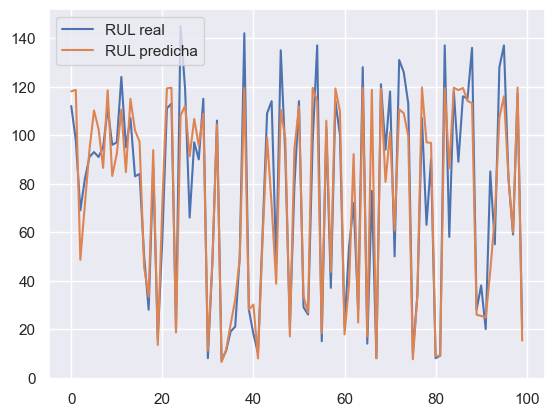

In [57]:
# Crear secuencias para el conjunto de prueba
def create_sequences_test(data, seq_length, features):
    X_test = []
    for unit in data['unit'].unique():
        unit_data = data[data['unit'] == unit]
        # Tomar la última secuencia completa para cada motor
        if len(unit_data) >= seq_length:
            X_test.append(unit_data[features].iloc[-seq_length:].values)
    return np.array(X_test)

# Usar el test_data_scaled y crear las secuencias
X_test = create_sequences_test(test_data_scaled, sequence_length, features)
# Realizar predicciones con el modelo entrenado
y_pred = model.predict(X_test)


# Evaluación de las predicciones
plt.plot(true_rul, label='RUL real')
plt.plot(y_pred, label='RUL predicha')
plt.legend()
plt.show()

In [58]:
y_pred

array([[118.05834 ],
       [118.675026],
       [ 48.56494 ],
       [ 71.58806 ],
       [ 93.89948 ],
       [110.16299 ],
       [102.51378 ],
       [ 86.5197  ],
       [118.4645  ],
       [ 83.17249 ],
       [ 92.25989 ],
       [110.53876 ],
       [ 84.746796],
       [114.92856 ],
       [101.92471 ],
       [ 97.31986 ],
       [ 45.52103 ],
       [ 33.254337],
       [ 93.855225],
       [ 13.469714],
       [ 71.593124],
       [119.30174 ],
       [119.51416 ],
       [ 18.617952],
       [108.003235],
       [112.07698 ],
       [ 91.28865 ],
       [106.65619 ],
       [ 95.697014],
       [108.86044 ],
       [ 11.144459],
       [ 48.07559 ],
       [104.39767 ],
       [  6.420432],
       [ 11.467138],
       [ 21.967276],
       [ 32.14891 ],
       [ 49.177723],
       [119.60096 ],
       [ 28.087542],
       [ 30.108747],
       [  7.885209],
       [ 56.656574],
       [ 98.933014],
       [ 71.09089 ],
       [ 38.676125],
       [110.3921  ],
       [ 98.5

In [59]:
X_test

array([[[0.15060241, 0.3795509 , 0.222316  , ..., 0.41666667,
         0.68217054, 0.68682684],
        [0.37650602, 0.34663179, 0.32224848, ..., 0.41666667,
         0.72868217, 0.72134769],
        [0.37048193, 0.2851537 , 0.40800135, ..., 0.25      ,
         0.66666667, 0.66210991],
        ...,
        [0.22289157, 0.35120994, 0.26772451, ..., 0.33333333,
         0.68217054, 0.64609224],
        [0.47590361, 0.32003488, 0.3160027 , ..., 0.25      ,
         0.73643411, 0.7079536 ],
        [0.4126506 , 0.22193155, 0.2812289 , ..., 0.41666667,
         0.51937984, 0.63656448]],

       [[0.45481928, 0.39481142, 0.31127616, ..., 0.41666667,
         0.48837209, 0.49061033],
        [0.33433735, 0.42903859, 0.3401418 , ..., 0.5       ,
         0.58139535, 0.67578017],
        [0.37048193, 0.3148027 , 0.513842  , ..., 0.41666667,
         0.57364341, 0.48784866],
        ...,
        [0.4939759 , 0.36058426, 0.3541526 , ..., 0.33333333,
         0.57364341, 0.55550953],
        [0.4

In [60]:
len(X_test)

100

In [ ]:
# predict and evaluate
y_hat_train = model.predict(X_train)

551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [ ]:
evaluate(y_train, y_hat_train, 'train')
evaluate(true_rul.to_numpy(), y_pred)

train set RMSE:14.806936944986063, R2:0.8815646122916083
test set RMSE:14.48300430658606, R2:0.8785331482211567


-	Con el modelo LSTM Seobtuvieron mejores predicciones con valores de RMSE:14.923077209180377, R2:0.8710393457669537 que no es lo ideal pero se acerca a lo buscado

In [78]:
X_train.shape

(17631, 30, 14)

REGRESION LINEAL CON AJUSTE DE HIPERPARAMETROS

In [10]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19']#Sensors not taken into account for the evaluation
drop_labels = index_names

X_trainreg2 = train.drop(drop_labels, axis=1)
y_trainreg2 = X_trainreg2.pop('RUL')

X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

# create and fit model
lm = LinearRegression()
lm.fit(X_trainreg2, y_trainreg2)

# predict and evaluate
y_hat_train = lm.predict(X_trainreg2)
evaluate(y_trainreg2, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66035980172261, R2:0.5795961126406313
test set RMSE:32.04109478174292, R2:0.4054954961204752


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


#optimización
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=45) #para nsplits=5 demora 35 min approx en google colab.

# pipeline
pipeline_log_reg_pca = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=2)),
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()), #zscore
    ('pca', PCA(n_components=0.95)), #comprime: 95% variance retained (information retained)
    ('reg', LinearRegression())
])

lambda_range = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
C_range = [1 / (lambda_value) for lambda_value in lambda_range] #transforma al inverso de lambda
param_grid = {'poly__degree': np.arange(1, 10)}

search = GridSearchCV(pipeline_log_reg_pca, param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=4)
result = search.fit(X_trainreg2, y_trainreg2)

print(f'Mejor RMSE en el conj. de validación: {result.best_score_} para {result.best_params_}')


Fitting 2 folds for each of 9 candidates, totalling 18 fits


c:\Users\equipo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV 1/2] END ................poly__degree=1;, score=-2281.593 total time= 1.3min
[CV 2/2] END ................poly__degree=1;, score=-2296.622 total time=  54.1s
[CV 1/2] END ................poly__degree=2;, score=-2281.581 total time=  50.7s
[CV 2/2] END ................poly__degree=2;, score=-2296.616 total time=  54.3s
[CV 1/2] END ................poly__degree=3;, score=-2281.596 total time=  48.2s
[CV 2/2] END ................poly__degree=3;, score=-2296.638 total time=  50.4s
[CV 1/2] END ................poly__degree=4;, score=-2281.641 total time=  48.9s
[CV 2/2] END ................poly__degree=4;, score=-2296.689 total time=  54.9s
[CV 1/2] END ................poly__degree=5;, score=-2288.540 total time=  51.0s
[CV 2/2] END ................poly__degree=5;, score=-2301.945 total time=  52.4s
[CV 1/2] END ................poly__degree=6;, score=-2288.795 total time=  52.2s
[CV 2/2] END ................poly__degree=6;, score=-2302.175 total time=  52.7s
[CV 1/2] END ...............

In [ ]:

#reentreno con mejores
pipeline_log_reg_pca.set_params(poly__degree=result.best_params_['poly__degree'])
pipeline_log_reg_pca.fit(X_trainreg2, y_trainreg2)

#evaluamos en el conjunto de test
pred_test = pipeline_log_reg_pca.predict(X_test)
f1score = metrics.f1_score(y_test, pred_test)
acc = metrics.accuracy_score(y_test, pred_test)
preci = metrics.precision_score(y_test, pred_test)
recall = metrics.recall_score(y_test, pred_test)

print("Para el modelo optimizado, métricas en el conjunto de test: recall = ", recall, ", F1 = ", f1score, ", acc = ", acc, ", precision = ", preci, )


In [2]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train_reg, y_train_reg, test_size=0.2, random_state=42)

# Definir el modelo y el rango de hiperparámetros para alpha
lasso = Lasso(max_iter=10000)
alpha_values = np.logspace(-4, 1, 50)
param_grid = {'alpha': alpha_values}

# Optimización del hiperparámetro alpha usando GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']
best_lasso = grid_search.best_estimator_

# Predicción en el conjunto de prueba
y_pred = best_lasso.predict(X_test)

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mejor valor de alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Gráfico de predicción vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales para Lasso")
plt.show()

# Error de entrenamiento y validación vs Alpha
train_errors, val_errors = [], []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    y_train_pred = lasso.predict(X_train)
    y_val_pred = lasso.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_test, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_errors, label='Training Error', color='blue')
plt.plot(alpha_values, val_errors, label='Validation Error', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Error vs Alpha')
plt.legend()
plt.show()


NameError: name 'X_train_reg' is not defined